In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv


In [6]:

df1 = pd.read_csv('europarl-v10.el-en.tsv.gz', sep='\t', quoting=csv.QUOTE_NONE, on_bad_lines='skip')


/var/folders/js/rpgbtqk16klblkqlcbv7mp380000gn/T/ipykernel_22134/2610272692.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('europarl-v10.el-en.tsv.gz', sep='\t', quoting=csv.QUOTE_NONE, on_bad_lines='skip')


In [7]:
df1.head(10)

,4.,4..1,ep-09-11-26-008-04.txt,008-04,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,Κύρωση και εφαρμογή των αναθεωρημένων συμβάσεω...,The ratification and implementation of the upd...,ep-09-11-26-008-04.txt,008-04,NaN,NaN,NaN,NaN
1,7.,7.,ep-08-03-12-005-07.txt,005-07,NaN,NaN,NaN,NaN
2,Βιώσιμη γεωργία και βιοαέριο: ανάγκη αναθεώρησ...,Sustainable agriculture and biogas: review of ...,ep-08-03-12-005-07.txt,005-07,NaN,NaN,NaN,NaN
3,- Πριν από την ψηφοφορία επί της παραγράφου 41:,- Before the vote on paragraph 41:,ep-08-03-12-005-07.txt,005-07,NaN,NaN,NaN,NaN
4,"εισηγητής. - (EN) Κύριε Πρόεδρε, συμφωνήσαμε ν...","rapporteur. - Mr President, we agreed to chang...",ep-08-03-12-005-07.txt,005-07,101.0,Csaba Sándor Tabajdi,NaN,NaN
5,"Το κείμενο έχει ως εξής: ""Προτείνει την περιεκ...",The text is as follows: 'Proposes the comprehe...,ep-08-03-12-005-07.txt,005-07,101.0,Csaba Sándor Tabajdi,NaN,NaN
6,"Επιπλέον, συμφωνήσαμε να διαγράψουμε το σημείο...",Plus we agreed to delete point '(a)'.,ep-08-03-12-005-07.txt,005-07,101.0,Csaba Sándor Tabajdi,NaN,NaN
7,(Το Σώμα εγκρίνει την προφορική τροπολογία),(Parliament agreed to accept the oral amendment),ep-08-03-12-005-07.txt,005-07,101.0,Csaba Sándor Tabajdi,NaN,NaN
8,Συμβούλιο Ανθρωπίνων Δικαιωμάτων των Ηνωμένων ...,United Nations Human Rights Council (debate),ep-07-06-06-014.txt,014,NaN,NaN,NaN,NaN
9,""" ημερήσια διάταξη προβλέπει τις δηλώσεις του ...",The next item is the Council and Commission st...,ep-07-06-06-014.txt,014,107.0,Πρόεδρος,NaN,NaN


In [9]:
df1.isnull().sum()

4.                          5403
4..1                        1278
ep-09-11-26-008-04.txt         0
008-04                    432654
Unnamed: 4                447330
Unnamed: 5                 17652
Unnamed: 6                645618
Unnamed: 7                825901
dtype: int64

In [11]:
df1.rename(columns={'4.': 'Greek', '4..1': 'english'}, inplace=True)

In [12]:
df1.columns

Index(['Greek', 'english', 'ep-09-11-26-008-04.txt', '008-04', 'Unnamed: 4',
       'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7'],
      dtype='object')

In [42]:
data = df1[['Greek','english']]

In [43]:
data = data[['english','Greek']]

In [44]:
data.head()

,english,Greek
0,The ratification and implementation of the upd...,Κύρωση και εφαρμογή των αναθεωρημένων συμβάσεω...
1,7.,7.
2,Sustainable agriculture and biogas: review of ...,Βιώσιμη γεωργία και βιοαέριο: ανάγκη αναθεώρησ...
3,- Before the vote on paragraph 41:,- Πριν από την ψηφοφορία επί της παραγράφου 41:
4,"rapporteur. - Mr President, we agreed to chang...","εισηγητής. - (EN) Κύριε Πρόεδρε, συμφωνήσαμε ν..."


In [45]:
data = data.dropna()
data.isnull().sum()

english    0
Greek      0
dtype: int64

In [46]:
data.shape

(1151942, 2)

In [49]:
import nltk
import re
from nltk.tokenize import word_tokenize
import spacy

In [50]:
def contains_alphabetic(text):
    return bool(re.search(r'[a-zA-Z]', text))

def filter_df_by_alphabetic(df, column_name):
    return df[df[column_name].apply(contains_alphabetic)]

data = filter_df_by_alphabetic(data, 'Greek')
data = filter_df_by_alphabetic(data, 'english')

In [51]:
data = data.reset_index(drop=True)


In [52]:
data.head()

,english,Greek
0,"rapporteur. - Mr President, we agreed to chang...","εισηγητής. - (EN) Κύριε Πρόεδρε, συμφωνήσαμε ν..."
1,"Mr President, Commissioner Ferrero-Waldner, la...","Προεδρεύων του Συμβουλίου. (DE) Κύριε Πρόεδρε,..."
2,"Mr President, President-in-Office Günter Glose...","Μέλος της Επιτροπής. (DE) Κύριε Πρόεδρε, κύριε..."
3,on behalf of the PPE-DE Group. - (LT) First of...,εξ ονόματος της Ομάδας PPE-DE. - (LT) Καταρχάς...
4,on behalf of the PSE Group. - (ES) Mr Presiden...,εξ ονόματος της Ομάδας PSE. - (ES) Κύριε Πρόεδ...


In [53]:
data.index

RangeIndex(start=0, stop=8979, step=1)

In [54]:
type(data['english'][0])

str

In [55]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(data, test_size=0.2, random_state=42)

In [56]:
type(data['english'][0])

str

In [57]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-el")
model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-en-el")


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [59]:
input_text = "How are you?"

inputs = tokenizer(input_text, return_tensors="pt", padding=True, truncation=True).to('cpu')

with torch.no_grad():
    outputs = model.generate(**inputs)

translated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(f"Original text: {input_text}")
print(f"Translated text: {translated_text}")

Original text: How are you?
Translated text: Πώς είσαι;


In [60]:
def tokenize_row(row):
    inputs = tokenizer(row['Greek'], max_length=128, truncation=True, padding="max_length")
    with tokenizer.as_target_tokenizer():
        targets = tokenizer(row['english'], max_length=128, truncation=True, padding="max_length")
    
    inputs['labels'] = targets['input_ids']
    return inputs

tokenized_data = data.apply(tokenize_row, axis=1).apply(pd.Series)

import torch

def convert_to_torch_dataset(df):
    input_ids = torch.tensor(df['input_ids'].tolist())
    attention_mask = torch.tensor(df['attention_mask'].tolist())
    labels = torch.tensor(df['labels'].tolist())
    
    dataset = torch.utils.data.TensorDataset(input_ids, attention_mask, labels)
    return dataset

torch_dataset = convert_to_torch_dataset(tokenized_data)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:3921: UserWarning: `as_target_tokenizer` is deprecated and will be removed in v5 of Transformers. You can tokenize your labels by using the argument `text_target` of the regular `__call__` method (either in the same call as your input texts if you use the same keyword arguments, or in a separate call.
  warnings.warn(


In [61]:
X_train_tkn = tokenizer(train['english'].tolist(),max_length=180, padding=True, truncation=True, return_tensors="pt")
X_val_tkn = tokenizer(val['english'].tolist(),max_length=180, padding=True, truncation=True, return_tensors="pt")

In [62]:
with tokenizer.as_target_tokenizer():
        y_train_tkn = tokenizer(train['Greek'].tolist(), max_length=180, padding=True, truncation=True, return_tensors="pt")
        y_val_tkn = tokenizer(val['Greek'].tolist(), max_length=180, padding=True, truncation=True, return_tensors="pt")

In [63]:
X_train = X_train_tkn['input_ids']
X_train_mask = X_train_tkn['attention_mask']
y_train=y_train_tkn['input_ids']
y_train_mask = y_train_tkn['attention_mask']
X_val = X_val_tkn['input_ids']
X_val_mask = X_val_tkn['attention_mask']
y_val=y_val_tkn['input_ids']
y_val_mask = y_val_tkn['attention_mask']

In [64]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
import torch.optim as optim

batch_size = 16

train_dataset = TensorDataset(X_train, X_train_mask, y_train, y_train_mask)
train_dataloader = DataLoader(train_dataset, sampler=RandomSampler(train_dataset), batch_size=batch_size)

val_dataset = TensorDataset(X_val, X_val_mask, y_val, y_val_mask)
val_dataloader = DataLoader(val_dataset, sampler=RandomSampler(val_dataset), batch_size=batch_size)

In [65]:
optimizer = optim.AdamW(model.parameters(), lr=2e-5)
if torch.backends.mps.is_available():
    device = torch.device("mps")
elif torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [ ]:
encoder_layer_count = len(model.model.encoder.layers)
decoder_layer_count = len(model.model.decoder.layers)


In [67]:
# Freeze encoder layers
for i in range(5):
    for param in model.model.encoder.layers[i].parameters():
        param.requires_grad = False

# Freeze decoder layers
for i in range(5):
    for param in model.model.decoder.layers[i].parameters():
        param.requires_grad = False

In [69]:
import numpy as np

model.train()
model = model.to(device)
epochs=[]
loss_values=[]
for epoch in range(5):
    total_loss=0

    for step, batch in enumerate(train_dataloader):
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels, b_label_mask  = batch
        optimizer.zero_grad()

        outputs = model(b_input_ids, attention_mask=b_input_mask, labels=b_labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_epoch_loss = total_loss / len(train_dataloader)
    loss_values.append(avg_epoch_loss)
    print(f'Epoch {epoch + 1}, Loss: {avg_epoch_loss:.4f}')

Epoch 1, Loss: 0.3693
Epoch 2, Loss: 0.2465
Epoch 3, Loss: 0.2296
Epoch 4, Loss: 0.2168
Epoch 5, Loss: 0.2057


In [70]:
torch.save(model.state_dict(), 'en_el_weights.pth')

In [71]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import os

In [72]:
os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'

def validate_model(model, validation_dataloader):
    model.to('cpu') 
    model.eval()
    total_val_loss = 0
    references = []
    hypotheses = []
    smoothie = SmoothingFunction().method4 

    with torch.no_grad():
        for step, batch in enumerate(validation_dataloader):
            batch = tuple(t.to('cpu') for t in batch)
            b_input_ids, b_input_mask, b_labels, b_label_mask = batch

            outputs = model(input_ids=b_input_ids, attention_mask=b_input_mask, labels=b_labels)
            loss = outputs.loss
            total_val_loss += loss.item()

            try:
                generated_ids = model.generate(
                    input_ids=b_input_ids,
                    attention_mask=b_input_mask,
                    max_length=128,  
                    num_beams=2,
                    early_stopping=True
                )
            except NotImplementedError as e:
                print(f"Error during generation: {e}")
                continue

            for i in range(len(generated_ids)):
                pred_sentence = generated_ids[i].tolist()
                true_sentence = b_labels[i][b_label_mask[i] == 1].tolist()

                hypotheses.append(pred_sentence)
                references.append([true_sentence])

    avg_val_loss = total_val_loss / len(validation_dataloader)
    print(f'Validation Loss: {avg_val_loss:.4f}')

    bleu_score = np.mean([
        sentence_bleu(ref, hyp, smoothing_function=smoothie) 
        for ref, hyp in zip(references, hypotheses)
    ])
    print(f'BLEU Score: {bleu_score:.4f}')

    return avg_val_loss, bleu_score

validation_loss, bleu_score = validate_model(model, val_dataloader)

Validation Loss: 4.0795
BLEU Score: 0.0193


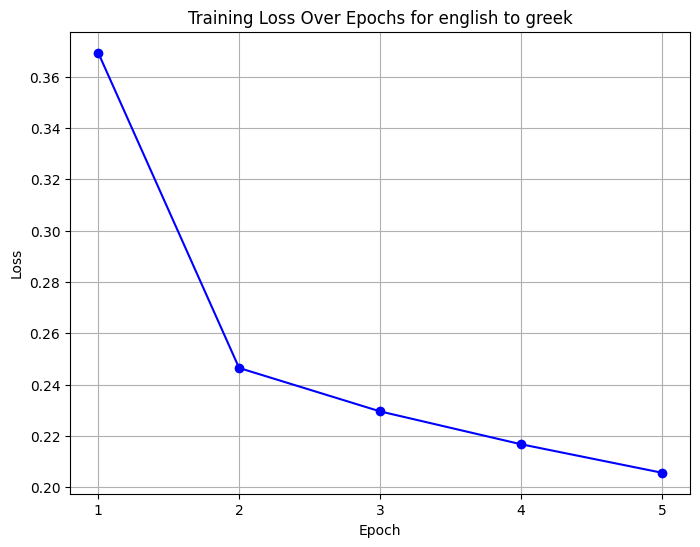

In [2]:
import matplotlib.pyplot as plt

# Data
epochs = [1, 2, 3, 4, 5]
loss = [0.3693, 0.2465, 0.2296, 0.2168, 0.2057]

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(epochs, loss, marker='o', linestyle='-', color='b')
plt.title('Training Loss Over Epochs for english to greek')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.xticks(epochs)  
plt.show()